<a href="https://colab.research.google.com/github/kameoman/pythonlesson/blob/main/Python_%2B_OpenCV%E3%81%AB%E3%82%88%E3%82%8B%E8%89%B2%E6%83%85%E5%A0%B1%E3%81%AE%E5%8F%96%E5%BE%97(%E5%AE%9F%E9%A8%93%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##実験１：画像の色検出（緑）

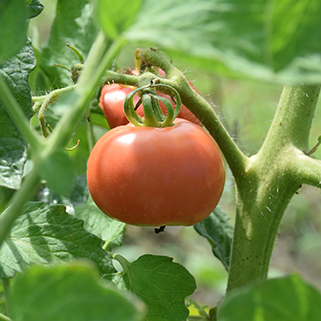

In [59]:
from IPython.display import Image
Image(filename='01.jpg')

In [60]:
import cv2
import numpy as np

img = cv2.imread("01.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 緑を検出
lower_color = np.array([36, 50, 70])
uppper_color = np.array([59, 255, 255])

mask = cv2.inRange(hsv, lower_color, uppper_color)
output = cv2.bitwise_and(hsv, hsv, mask = mask)

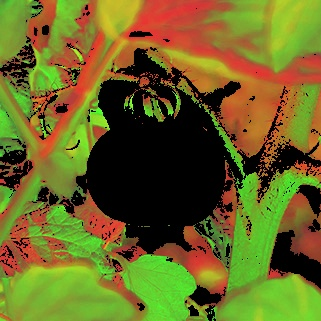

In [61]:
cv2.imwrite("01.jpg", output)
Image(filename='01.jpg') 

##実験2：画像の色検出（赤色）

In [ ]:
from IPython.display import Image
Image(filename='02.jpg')

In [62]:
import cv2
import numpy as np

img = cv2.imread("02.jpg")

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# 緑を検出
hsv_min = np.array([0,64,0])
hsv_max = np.array([30,255,255])
mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

hsv_min = np.array([150,64,0])
hsv_max = np.array([179,255,255])
mask2 = cv2.inRange(hsv, hsv_min, hsv_max)


mask = mask1 + mask2
output = cv2.bitwise_and(hsv, hsv, mask = mask)

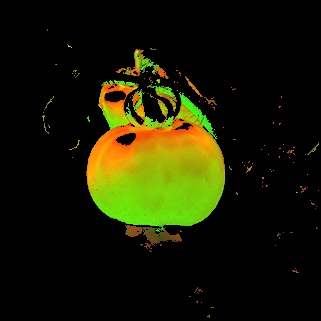

In [63]:
cv2.imwrite("02.jpg", output)
Image(filename='02.jpg') 

##Python + OpenCVによる色情報の取得

In [66]:

import cv2
import os

# 対象画像読み込み
img = cv2.imread("03.jpg",cv2.IMREAD_COLOR)

# 対象範囲を切り出し
boxFromX = 20 #対象範囲開始位置 X座標
boxFromY = 40 #対象範囲開始位置 Y座標
boxToX = 80 #対象範囲終了位置 X座標
boxToY = 60 #対象範囲終了位置 Y座標
# y:y+h, x:x+w　の順で設定
imgBox = img[boxFromY: boxToY, boxFromX: boxToX]

# RGB平均値を出力
# flattenで一次元化しmeanで平均を取得 
b = imgBox.T[0].flatten().mean()
g = imgBox.T[1].flatten().mean()
r = imgBox.T[2].flatten().mean()

# RGB平均値を取得
print("B: %.2f" % (b))
print("G: %.2f" % (g))
print("R: %.2f" % (r))

# BGRからHSVに変換
imgBoxHsv = cv2.cvtColor(imgBox,cv2.COLOR_BGR2HSV)

# HSV平均値を取得
# flattenで一次元化しmeanで平均を取得 
h = imgBoxHsv.T[0].flatten().mean()
s = imgBoxHsv.T[1].flatten().mean()
v = imgBoxHsv.T[2].flatten().mean()

# HSV平均値を出力
# uHeは[0,179], Saturationは[0,255]，Valueは[0,255]
print("Hue: %.2f" % (h))
print("Salute: %.2f" % (s))
print("Value: %.2f" % (v))


B: 90.16
G: 152.76
R: 112.76
Hue: 51.07
Salute: 111.78
Value: 152.81
